<a href="https://colab.research.google.com/github/ForhanShahriarFahim/Artificial-Intelligence-Lab/blob/master/Group_9_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Necessary Modules


In [202]:
from google.colab import drive
import os
import cv2
import time
import matplotlib.pyplot as plt
import random
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from keras.layers import Conv2D, Input, Dense, Activation, MaxPooling2D, Flatten, Dropout,GlobalAveragePooling2D
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score

### load file from google drive

In [203]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Dataset Path

In [204]:
train_badam_dir = "/content/drive/Shareddrives/CSE-RU 27/Set/Latest Dataset/train/Badam"
train_chola_dir = "/content/drive/Shareddrives/CSE-RU 27/Set/Latest Dataset/train/Chola"
test_badam_dir = "/content/drive/Shareddrives/CSE-RU 27/Set/Latest Dataset/test/Badam"
test_chola_dir = "/content/drive/Shareddrives/CSE-RU 27/Set/Latest Dataset/test/Chola"
val_badam_dir = "/content/drive/Shareddrives/CSE-RU 27/Set/Latest Dataset/validation/Badam"
val_chola_dir = "/content/drive/Shareddrives/CSE-RU 27/Set/Latest Dataset/validation/Chola"
# train_dir = "./Latest Dataset/train"
# validation_dir = "./Latest Dataset/validation"
# test_dir = "./Latest Dataset/test"

### Dataset Load

In [205]:
IMAGE_WIDTH, IMAGE_HEIGHT = 32, 32

def load_images(directory):
    images = []
    labels = []
    idx = 1
    for filename in os.listdir(directory):
        if filename.lower().endswith(('.jpg', '.jpeg')):
            print(f"\rimage no: {idx}", end='')
            idx = idx + 1
            img = cv2.imread(os.path.join(directory, filename))
            img = cv2.resize(img, (IMAGE_WIDTH, IMAGE_HEIGHT))
            # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            images.append(img)
            if 'Badam' in directory:
                labels.append(0)
            elif 'Chola' in directory:
                labels.append(1)
    return np.array(images), np.array(labels)


print("Loading train images...")
train_badam_images, train_badam_labels = load_images(train_badam_dir)
print()
train_chola_images, train_chola_labels = load_images(train_chola_dir)
print("\nLoading test images...")
test_badam_images, test_badam_labels = load_images(test_badam_dir)
print()
test_chola_images, test_chola_labels = load_images(test_chola_dir)
print("\nLoading validation images...")
val_badam_images, val_badam_labels = load_images(val_badam_dir)
print()
val_chola_images, val_chola_labels = load_images(val_chola_dir)

train_images = np.concatenate((train_badam_images, train_chola_images))
train_labels = np.concatenate((train_badam_labels, train_chola_labels))
test_images = np.concatenate((test_badam_images, test_chola_images))
test_labels = np.concatenate((test_badam_labels, test_chola_labels))
val_images = np.concatenate((val_badam_images, val_chola_images))
val_labels = np.concatenate((val_badam_labels, val_chola_labels))

train_images = train_images / 255.0
test_images = test_images / 255.0
val_images = val_images / 255.0

print(f'\nShape of train_badam_images: {train_images.shape}')
print(f'Shape of test_badam_images: {train_labels.shape}')
print(f'Shape of test_badam_images: {test_images.shape}')
print(f'Shape of test_badam_images: {test_labels.shape}')
print(f'Shape of val_chola_images: {val_images.shape}')
print(f'Shape of val_chola_images: {val_labels.shape}')

Loading train images...
image no: 551
image no: 551
Loading test images...
image no: 110
image no: 110
Loading validation images...
image no: 55
image no: 55
Shape of train_badam_images: (1102, 32, 32, 3)
Shape of test_badam_images: (1102,)
Shape of test_badam_images: (220, 32, 32, 3)
Shape of test_badam_images: (220,)
Shape of val_chola_images: (110, 32, 32, 3)
Shape of val_chola_images: (110,)


### Number of Samples

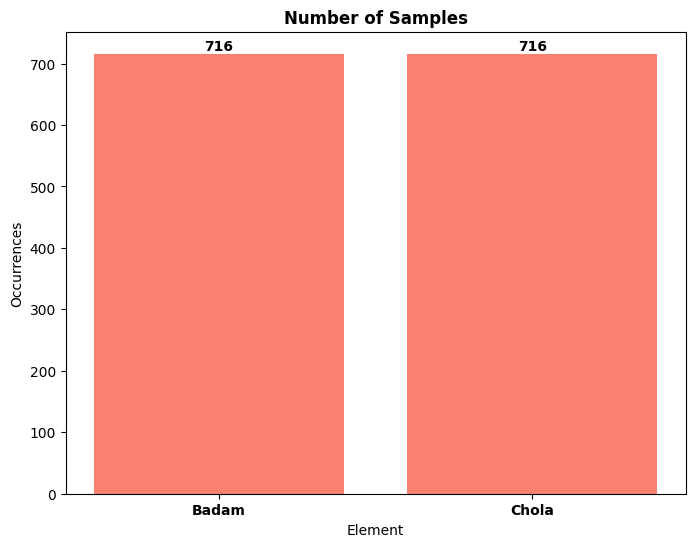

In [206]:
# Concatenate labels from all sets
labels = np.concatenate((train_labels, test_labels, val_labels))

# Count occurrences of each label
values, counts = np.unique(labels, return_counts=True)

# Create bar plot
plt.figure(figsize=(8, 6))  # Set figure size
bars = plt.bar(values, counts, color='salmon')
plt.xlabel('Element')
plt.ylabel('Occurrences')
plt.title('Number of Samples', fontweight='bold')  # Bold title
for i, count in enumerate(counts):
    plt.text(values[i], count, str(count), ha='center', va='bottom', weight='bold')

plt.xticks(values, ['Badam', 'Chola'], weight='bold')  # Bold x-axis tick labels


# Save the figure
#plt.savefig('/content/drive/MyDrive/Classifier Dataset/Trans images/total_samples.png')

plt.show()


#Number of sample split for each group

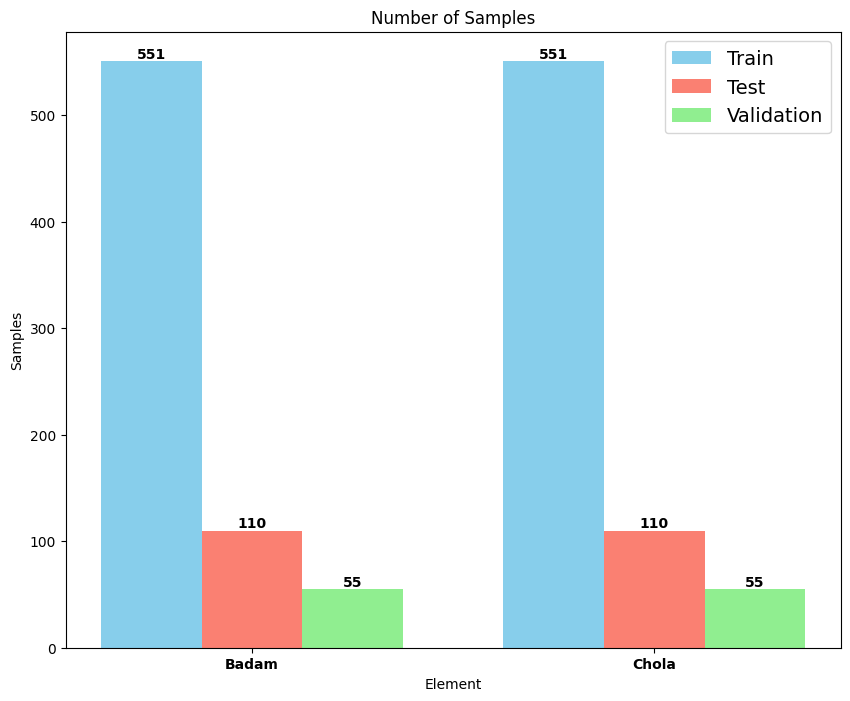

In [207]:
# Calculate counts for each label in train, test, and val sets
train_values, train_counts = np.unique(train_labels, return_counts=True)
test_values, test_counts = np.unique(test_labels, return_counts=True)
val_values, val_counts = np.unique(val_labels, return_counts=True)

# Set the width of each individual bar
bar_width = 0.25

# Set the x positions for the train, test, and val bars
train_x = np.arange(len(train_values)) - bar_width
test_x = np.arange(len(test_values))
val_x = np.arange(len(val_values)) + bar_width

# Set figure size
plt.figure(figsize=(10, 8))

# Plot the train bars and their counts with color skyblue
plt.bar(train_x, train_counts, width=bar_width, label='Train', color='skyblue')
for i, count in enumerate(train_counts):
    plt.text(train_x[i], count, str(count), ha='center', va='bottom',  weight = 'bold')

# Plot the test bars and their counts with color salmon
plt.bar(test_x, test_counts, width=bar_width, label='Test', color='salmon')
for i, count in enumerate(test_counts):
    plt.text(test_x[i], count, str(count), ha='center', va='bottom', weight = 'bold')

# Plot the val bars and their counts with color lightgreen
plt.bar(val_x, val_counts, width=bar_width, label='Validation', color='lightgreen')
for i, count in enumerate(val_counts):
    plt.text(val_x[i], count, str(count), ha='center', va='bottom', weight = 'bold')

plt.xlabel('Element')
plt.ylabel('Samples')
plt.title('Number of Samples')

# Set x-axis ticks and labels
plt.xticks(test_x, ['Badam', 'Chola'], weight='bold')

# Add legend
plt.legend(fontsize=14)

# Save the plot
#plt.savefig('/content/drive/MyDrive/Classifier Dataset/Images Save/spillited_samples.png')

# Show the plot
plt.show()


#Display Data

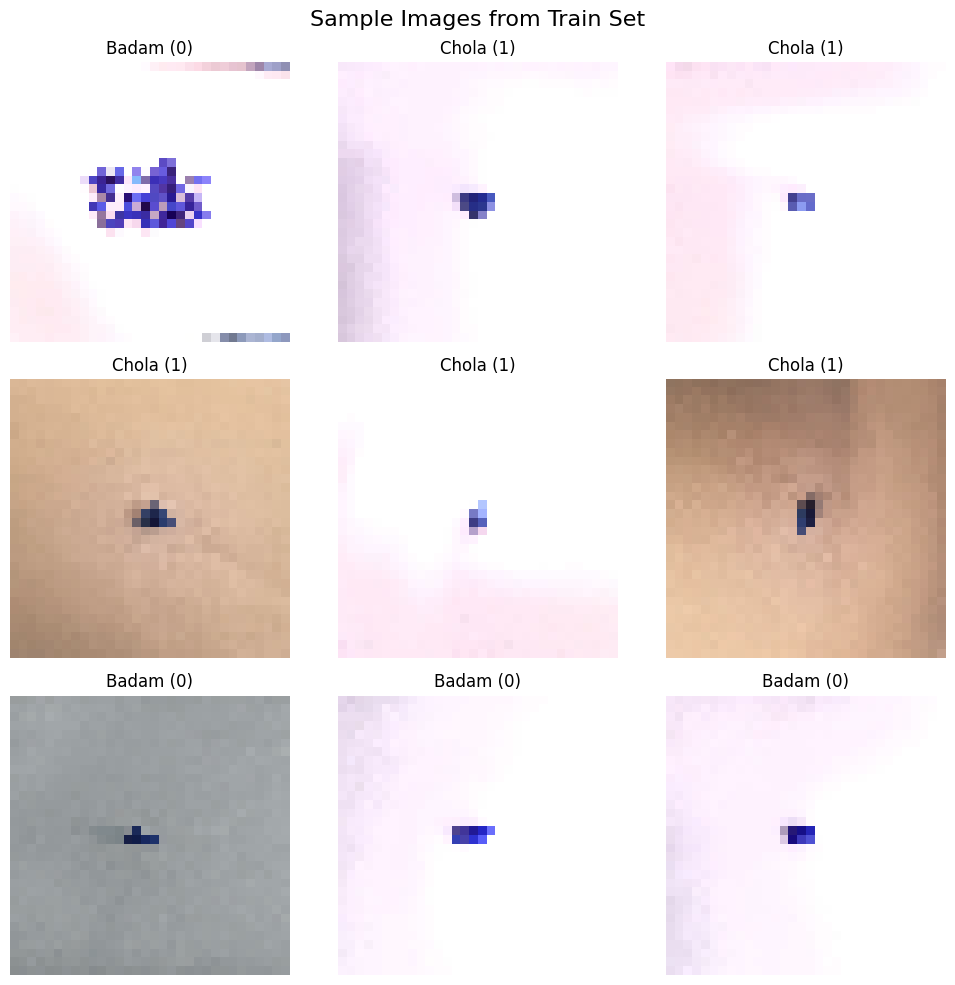

In [208]:
# Define the number of images to plot
num_images = 9

# Get indices for random images from the train set
random_indices = np.random.choice(len(train_images), size=num_images, replace=False)

# Plot the images with labels
plt.figure(figsize=(10, 10))
for i, idx in enumerate(random_indices):
    plt.subplot(3, 3, i + 1)
    plt.imshow(train_images[idx])
    if train_labels[idx] == 0:
        label_text = 'Badam (0)'
    else:
        label_text = 'Chola (1)'
    plt.title(label_text, fontsize=12)
    plt.axis('off')

plt.suptitle('Sample Images from Train Set', fontsize=16)
plt.tight_layout()
plt.show()


Label: badam


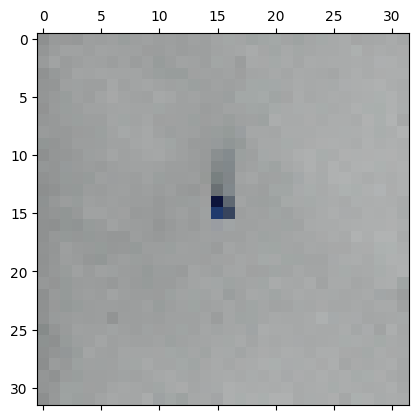

In [209]:
idx = 20
print("Label:", 'badam' if labels[idx]==0 else 'chola')
plt.matshow(train_images[idx])

### Using General CNN classifier model

In [210]:
# Define input shape
input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, 3)
inputs = Input(shape=input_shape)

# First Convolutional Layer
conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv1)
pool1 = MaxPooling2D((2, 2))(conv2)

# Second Convolutional Layer
conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool1)
conv4 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
conv5 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv4)
pool2 = MaxPooling2D((2, 2))(conv5)

# Flatten the output
flatten = Flatten()(pool2)

# Dense Layer
dense1 = Dense(512, activation='relu')(flatten)
dense2 = Dense(512, activation='relu')(dense1)

# Output layer with 2 neurons for binary classification
outputs = Dense(2, activation='softmax')(dense2)

# Create model
cnn_model = Model(inputs=inputs, outputs=outputs)

# Compile the model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the summary of the model
cnn_model.summary()



Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_40 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 conv2d_41 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 16, 16, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_42 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 conv2d_43 (Conv2D)          (None, 16, 16, 128)       147584    
                                                          

#Training and calculating time

In [211]:
# Training
start_time = time.time()
cnn_history = cnn_model.fit(train_images, train_labels, validation_data=(val_images, val_labels), epochs=15)
end_time = time.time()
cnn_training_time = end_time - start_time

Epoch 1/15
35/35 [==============================] - 24s 652ms/step - loss: 0.7030 - accuracy: 0.5091 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/15
35/35 [==============================] - 22s 621ms/step - loss: 0.6933 - accuracy: 0.4955 - val_loss: 0.6917 - val_accuracy: 0.5000
Epoch 3/15
35/35 [==============================] - 22s 612ms/step - loss: 0.6975 - accuracy: 0.5136 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 4/15
35/35 [==============================] - 23s 662ms/step - loss: 0.6911 - accuracy: 0.5272 - val_loss: 0.6629 - val_accuracy: 0.8818
Epoch 5/15
35/35 [==============================] - 21s 590ms/step - loss: 0.5013 - accuracy: 0.7768 - val_loss: 0.3347 - val_accuracy: 0.9091
Epoch 6/15
35/35 [==============================] - 22s 634ms/step - loss: 0.3160 - accuracy: 0.8766 - val_loss: 0.2067 - val_accuracy: 0.9545
Epoch 7/15
35/35 [==============================] - 21s 590ms/step - loss: 0.2509 - accuracy: 0.8975 - val_loss: 0.1507 - val_accuracy: 0.9455

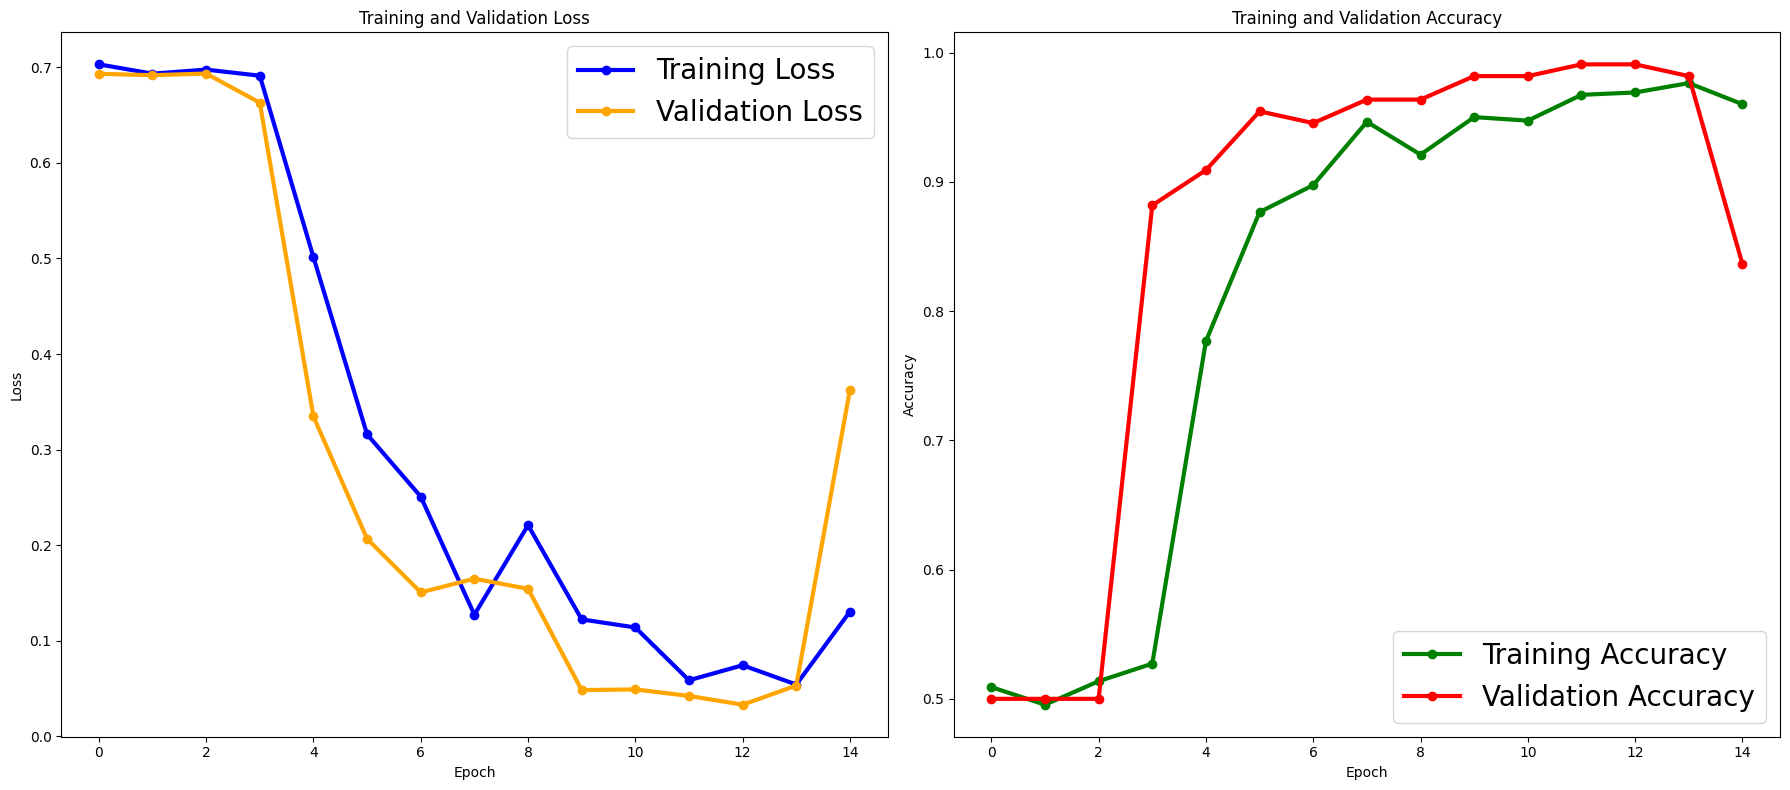

In [212]:
plt.figure(figsize=(18, 8))

# Plot Training Loss
plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['loss'], '-o', label='Training Loss', color='blue', linewidth=3)  # Bold line
plt.plot(cnn_history.history['val_loss'], '-o', label='Validation Loss', color='orange', linewidth=3)  # Bold line
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend(fontsize=20)

# Plot Training Accuracy
plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['accuracy'], '-o', label='Training Accuracy', color='green', linewidth=3)  # Bold line
plt.plot(cnn_history.history['val_accuracy'], '-o', label='Validation Accuracy', color='red', linewidth=3)  # Bold line
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(fontsize=20)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the plot if needed
#plt.savefig('/content/drive/MyDrive/Classifier Dataset/Images Save/CNN_Training_and_Validation_Accuracy.png')

# Show the plot
plt.show()


#Testing

In [213]:
test_loss, test_accuracy = cnn_model.evaluate(test_images, test_labels)
print(f"Test Loss: {test_loss :.7f}")
print(f"Test Accuracy: {test_accuracy*100 :.3f}%")

7/7 [==============================] - 1s 148ms/step - loss: 0.3000 - accuracy: 0.8773
Test Loss: 0.2999647
Test Accuracy: 87.727%


In [214]:
y_pred = cnn_model.predict(test_images)
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred[0]

7/7 [==============================] - 2s 239ms/step


array([0.24089587, 0.759104  ], dtype=float32)

Actual: chola


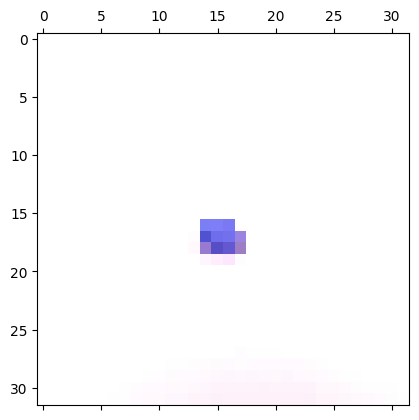

In [215]:
idx = 0
print(f'Actual: {"badam" if np.argmax(y_pred[idx]) == 0 else "chola"}')
plt.matshow(test_images[idx])

#Confusion Matrix for CNN

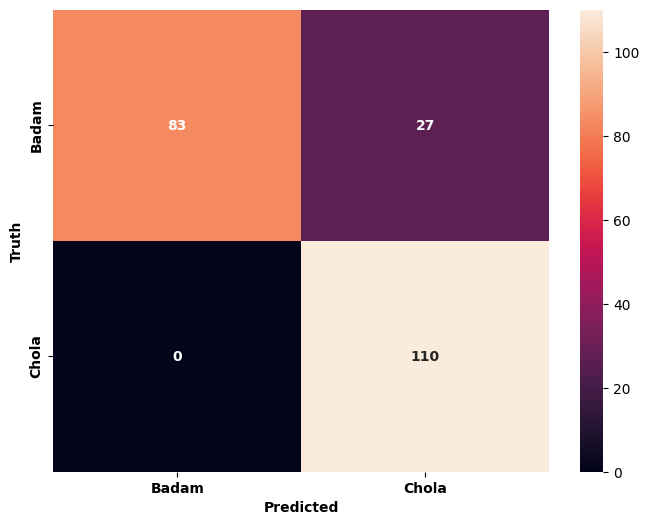

In [216]:
import seaborn as sn

cm = tf.math.confusion_matrix(labels=test_labels, predictions=y_pred_labels)

plt.figure(figsize=(8, 6))
heatmap = sn.heatmap(cm, annot=True, fmt='d', annot_kws={"weight": "bold"})  # Bold numbers inside the heatmap

heatmap.set_xlabel('Predicted', weight='bold')
heatmap.set_ylabel('Truth', weight='bold')
heatmap.set_xticklabels(['Badam', 'Chola'], ha='center', weight='bold')
heatmap.set_yticklabels(['Badam', 'Chola'], va='center', weight='bold')
#plt.savefig('/content/drive/MyDrive/Classifier Dataset/Images Save/confusion_matrix_CNN.png')
plt.show()


### Transfer Learning Vgg16 architecture for Binary Classification

In [238]:
# Load the pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False



In [243]:
# Add custom top layers for your classification task
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)  # Change 2 to the number of classes you have

# Create the final model
vgg_model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
vgg_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
vgg_model.summary()

Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0  

### Save the model using callback

In [219]:
# model_path = '/content/drive/MyDrive/Classifier Dataset/Model Save'
# callbacks = keras.callbacks.ModelCheckpoint(model_path, monitor='val_loss', save_best_only=True)

### Trainning The model

In [244]:
start_time = time.time()
vgg_history = vgg_model.fit(train_images, train_labels, validation_data=(val_images, val_labels), epochs=15)
end_time = time.time()
vgg_training_time = end_time - start_time


Epoch 1/15
35/35 [==============================] - 16s 420ms/step - loss: 0.6102 - accuracy: 0.6652 - val_loss: 0.4374 - val_accuracy: 0.8273
Epoch 2/15
35/35 [==============================] - 13s 383ms/step - loss: 0.4141 - accuracy: 0.8203 - val_loss: 0.2521 - val_accuracy: 0.9455
Epoch 3/15
35/35 [==============================] - 13s 381ms/step - loss: 0.3325 - accuracy: 0.8639 - val_loss: 0.1840 - val_accuracy: 0.9636
Epoch 4/15
35/35 [==============================] - 13s 380ms/step - loss: 0.2717 - accuracy: 0.8902 - val_loss: 0.2879 - val_accuracy: 0.8818
Epoch 5/15
35/35 [==============================] - 14s 389ms/step - loss: 0.2194 - accuracy: 0.9201 - val_loss: 0.1422 - val_accuracy: 0.9364
Epoch 6/15
35/35 [==============================] - 13s 374ms/step - loss: 0.1825 - accuracy: 0.9283 - val_loss: 0.1128 - val_accuracy: 0.9455
Epoch 7/15
35/35 [==============================] - 13s 368ms/step - loss: 0.1837 - accuracy: 0.9328 - val_loss: 0.1585 - val_accuracy: 0.9273

In [234]:
#model = keras.models.load_model(model_path)

In [245]:
performance_dict = vgg_history.history
print(performance_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


### Plotting

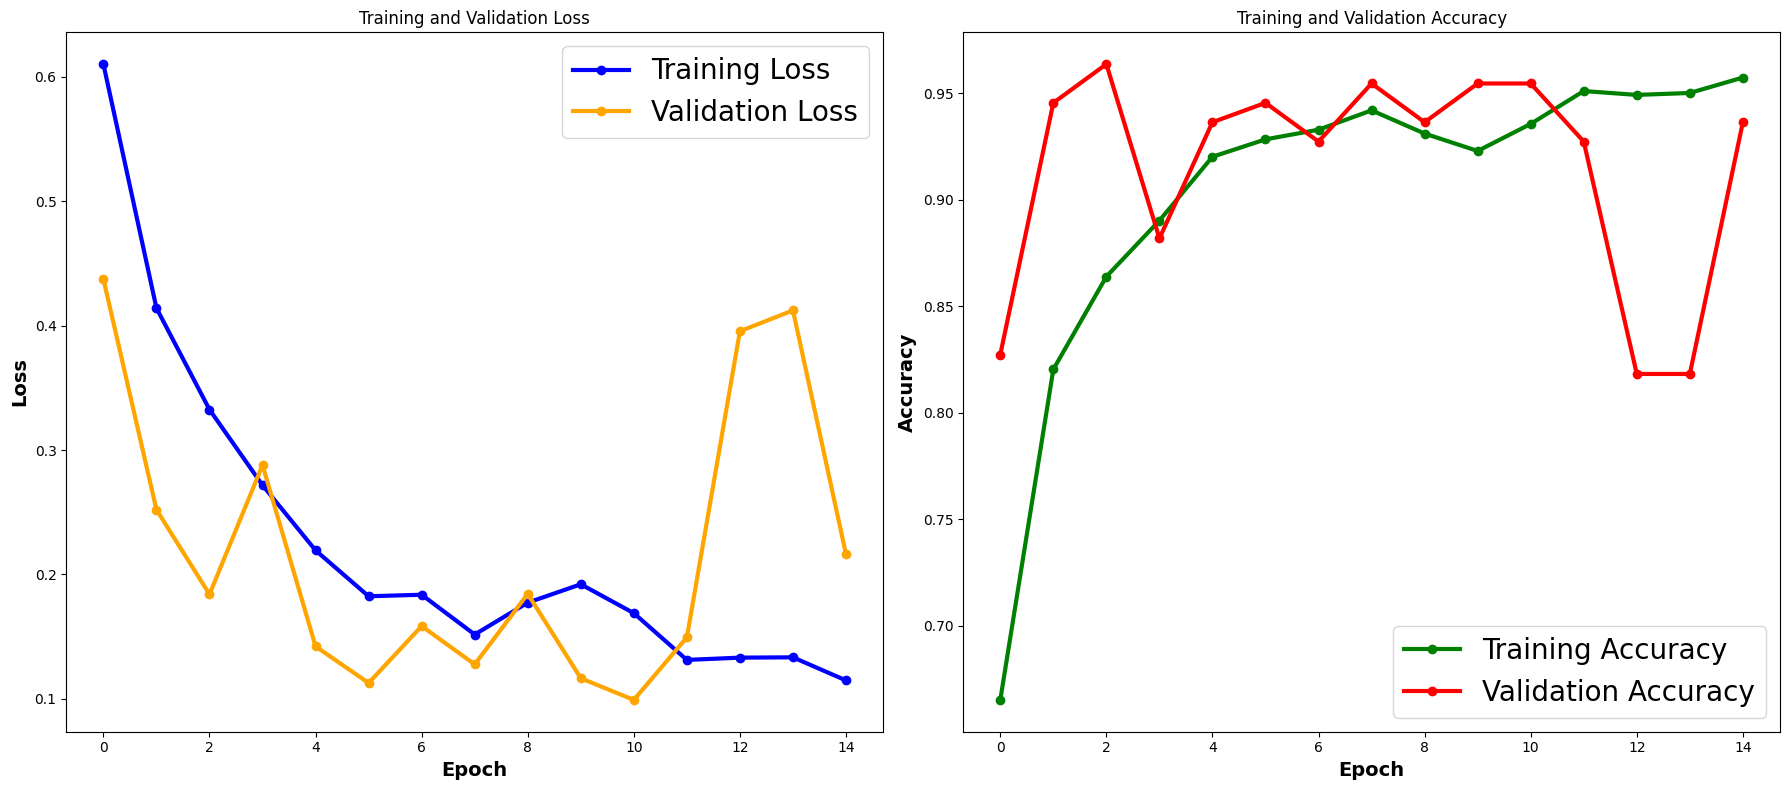

In [246]:
plt.figure(figsize=(18, 8))

# Plot Training Loss
plt.subplot(1, 2, 1)
plt.plot(vgg_history.history['loss'], '-o', label='Training Loss', color='blue', linewidth=3)  # Bold line
plt.plot(vgg_history.history['val_loss'], '-o', label='Validation Loss', color='orange', linewidth=3)  # Bold line
plt.xlabel('Epoch', fontsize=14, weight='bold')
plt.ylabel('Loss', fontsize=14, weight='bold')
plt.title('Training and Validation Loss')
plt.legend(fontsize=20)

# Plot Training Accuracy
plt.subplot(1, 2, 2)
plt.plot(vgg_history.history['accuracy'], '-o', label='Training Accuracy', color='green', linewidth=3)  # Bold line
plt.plot(vgg_history.history['val_accuracy'], '-o', label='Validation Accuracy', color='red', linewidth=3)  # Bold line
plt.xlabel('Epoch', fontsize=14, weight='bold')
plt.ylabel('Accuracy', fontsize=14, weight='bold')
plt.title('Training and Validation Accuracy')
plt.legend(fontsize=20)

# Adjust layout to prevent overlap
plt.tight_layout()
#plt.savefig('/content/drive/MyDrive/Classifier Dataset/Images Save/FCNN_Training_and_Validation_Accuracy_Loss.png')
# Show the plot
plt.show()


### Evaluate The Model On Testing set

In [247]:
test_loss, test_accuracy = vgg_model.evaluate(test_images, test_labels)
print(f"Test Loss: {test_loss :.7f}")
print(f"Test Accuracy: {test_accuracy*100 :.3f}%")

7/7 [==============================] - 2s 304ms/step - loss: 0.1097 - accuracy: 0.9500
Test Loss: 0.1097018
Test Accuracy: 95.000%


In [248]:
y_pred = vgg_model.predict(test_images)
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred[0]

7/7 [==============================] - 2s 302ms/step


array([9.9996966e-01, 3.0326926e-05], dtype=float32)

Actual: badam


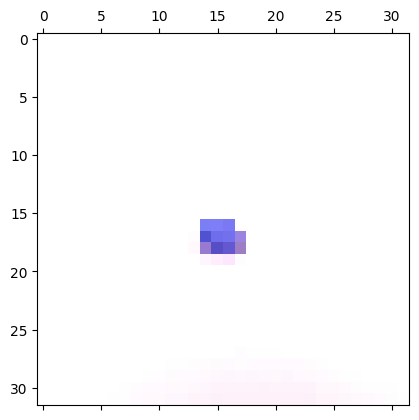

In [249]:
idx = 0
print(f'Actual: {"badam" if np.argmax(y_pred[idx]) == 0 else "chola"}')
plt.matshow(test_images[idx])

#Confusion Matrix using Transfer Learning

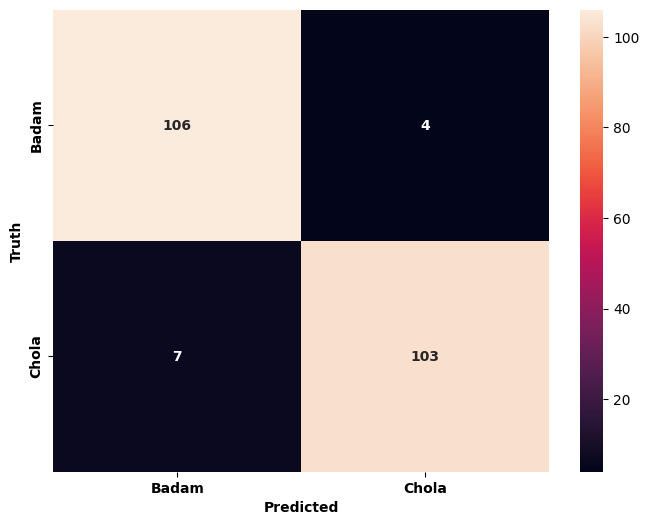

In [250]:
import seaborn as sn

cm = tf.math.confusion_matrix(labels=test_labels, predictions=y_pred_labels)

plt.figure(figsize=(8, 6))
heatmap = sn.heatmap(cm, annot=True, fmt='d', annot_kws={"weight": "bold"})  # Bold numbers inside the heatmap

heatmap.set_xlabel('Predicted', weight='bold')
heatmap.set_ylabel('Truth', weight='bold')
heatmap.set_xticklabels(['Badam', 'Chola'], ha='center', weight='bold')
heatmap.set_yticklabels(['Badam', 'Chola'], va='center', weight='bold')
#plt.savefig('/content/drive/MyDrive/Classifier Dataset/Images Save/confusion_matrix_CNN.png')
plt.show()

#Model Performance Comparison

In [251]:
# # Train the CNN model and store history
# cnn_history = cnn_model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))

# # Train the VGG16 model and store history
# vgg_history = vgg_model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))

4/4 [==============================] - 1s 255ms/step


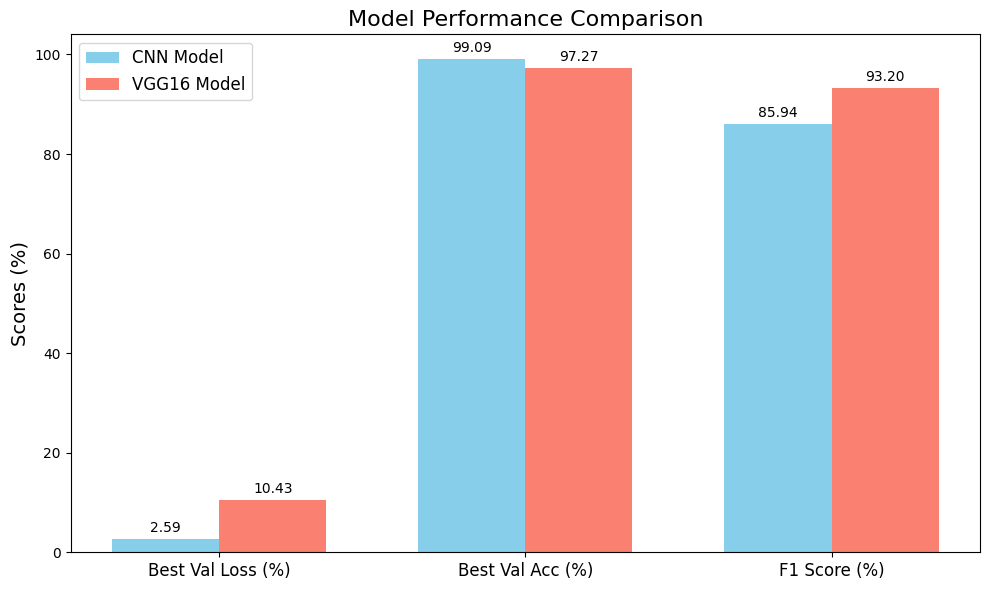

In [252]:


# Assuming you have the necessary variables: cnn_val_loss, cnn_val_accuracy, vgg_val_loss, vgg_val_accuracy,
# cnn_model, vgg_model, val_images, and val_labels

# Calculate F1 scores for both models
cnn_predictions = np.argmax(cnn_model.predict(val_images), axis=-1)
vgg_predictions = np.argmax(vgg_model.predict(val_images), axis=-1)
cnn_f1 = f1_score(val_labels, cnn_predictions)
vgg_f1 = f1_score(val_labels, vgg_predictions)

# Get best validation loss, accuracy, and F1 scores
best_cnn_val_loss = min(cnn_val_loss)
best_cnn_val_acc = max(cnn_val_accuracy)
best_vgg_val_loss = min(vgg_val_loss)
best_vgg_val_acc = max(vgg_val_accuracy)

# Convert to percentages
best_cnn_val_loss_percent = best_cnn_val_loss * 100
best_cnn_val_acc_percent = best_cnn_val_acc * 100
best_vgg_val_loss_percent = best_vgg_val_loss * 100
best_vgg_val_acc_percent = best_vgg_val_acc * 100
cnn_f1_percent = cnn_f1 * 100
vgg_f1_percent = vgg_f1 * 100

# Create bar chart
labels = ['Best Val Loss (%)', 'Best Val Acc (%)', 'F1 Score (%)']
cnn_values = [best_cnn_val_loss_percent, best_cnn_val_acc_percent, cnn_f1_percent]
vgg_values = [best_vgg_val_loss_percent, best_vgg_val_acc_percent, vgg_f1_percent]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, cnn_values, width, label='CNN Model', color='skyblue')
rects2 = ax.bar(x + width/2, vgg_values, width, label='VGG16 Model', color='salmon')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores (%)', fontsize=14)
ax.set_title('Model Performance Comparison', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=12)
ax.legend(prop={'size': 12})

# Add values on top of bars
for rects in [rects1, rects2]:
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()


### Training time comparison

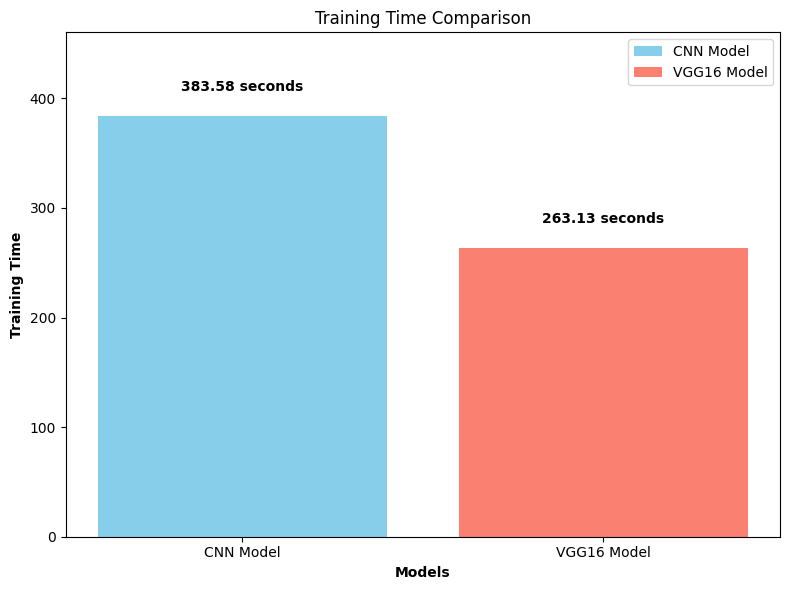

In [230]:
# Plot the training time comparison
models = ['CNN Model', 'VGG16 Model']
training_times = [cnn_training_time, vgg_training_time]

plt.figure(figsize=(8, 6))
bars = plt.bar(models, training_times, color=['skyblue', 'salmon'])
plt.xlabel('Models', weight='bold')
plt.ylabel('Training Time', weight='bold')
plt.title('Training Time Comparison')
plt.xticks()
plt.ylim(0, max(training_times) * 1.2)  # Set y-axis limit

# Add values on top of bars
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 20,  # Adjust the distance here (20)
             f'{training_times[i]:.2f} seconds',
             ha='center', va='bottom', weight='bold')

# Add legend
plt.legend(bars, models, loc='upper right')

plt.tight_layout()
plt.show()
